In [3]:
import torchvision
import torchvision.transforms as transforms
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

Files already downloaded


In [4]:
print(trainset)

In [5]:
import torch


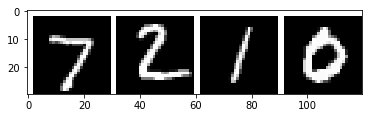

In [7]:

# functions to show an image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))

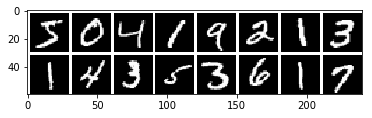

In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, 
                                          shuffle=False, num_workers=2)
dataiter = iter(trainloader)

images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [9]:
dataiter = iter(trainloader)
print(len(trainset.train_data))

60000


In [10]:

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 3)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(3, 5, 5)
        self.fc1   = nn.Linear(5*4*4, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #print (x.size())
        x = x.view(-1, 5*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [15]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # use a Classification Cross-Entropy loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
params = list(net.parameters())
for i,p in enumerate(params):
    print( "size of param " + str(i) + " " + str(p.size()))

size of param 0 torch.Size([3, 1, 3, 3])
size of param 1 torch.Size([3])
size of param 2 torch.Size([5, 3, 5, 5])
size of param 3 torch.Size([5])
size of param 4 torch.Size([120, 80])
size of param 5 torch.Size([120])
size of param 6 torch.Size([84, 120])
size of param 7 torch.Size([84])
size of param 8 torch.Size([10, 84])
size of param 9 torch.Size([10])


In [16]:
from torch.autograd import Variable

for epoch in range(10): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()        
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 1.395
[2,  2000] loss: 0.180
[3,  2000] loss: 0.124
[4,  2000] loss: 0.098
[5,  2000] loss: 0.083
[6,  2000] loss: 0.073
[7,  2000] loss: 0.065
[8,  2000] loss: 0.058
[9,  2000] loss: 0.053
[10,  2000] loss: 0.049
Finished Training


In [20]:
testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)

dataiter = iter(testloader)
images, labels = dataiter.next()
print (labels)
outputs = net(Variable(images))
_, predictions = torch.max(outputs.data, 1) ##ndarray.max	maxs, indices = torch.max(x, [dim]) - we want indices

print (predictions)


 7
 2
 1
 0
[torch.LongTensor of size 4]


 7
 2
 1
 0
[torch.LongTensor of size 4x1]



In [32]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 97 %
